###Instruction
 - There are 8 problems. 100 Points each. The full score is 720.
 - Work in your notebook.
 - You may show your work on a separate sheet of A4. I'll also check there for partial credit. If you just give you answer without justification and it's wrong I can't give you any partial credit.
 - You may ask me for python syntax or matplotlib question. But, you know you can use shift-tab or ? for documentation.
 - Make sure your code works in order doing Kernel-->restart and then Cell--> Run All. Make sure what appears in the ouput is what you expect

<span style="color:red">800/720 100+% A+++</span>

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

###Problem 1)(100) 25 each.

1.1) Find first 3 **non-zero** terms taylor series expansion of
$$ f(x) = \sqrt{1+x} $$ around $x=0$.

<span style="color:red">25</span>

In [2]:
print "1 + (x/2) - ((x^2)/8)"

1 + (x/2) - ((x^2)/8)


1.2) Use the taylor series above to estimate $$\sqrt{0.9}$$.

<span style="color:red">25</span>

In [3]:
print 1 + (-0.1/2) - (((-0.1)**2)/8)
# print 1 + (-0.1/2) - (((-0.1)**2)/8) + (3*(-0.1**3))/(8*6)
# print math.sqrt(0.9)

0.94875


1.3) What is the bound on **truncation error** for the estimate you got in 1.2)?

<span style="color:red">25</span>

In [4]:
print """
Truncation error bound = M*(x^3)/3!
M = f^3(z) = (3/8)*((1+z)**(-5/2))
z in range(-0.1,0.0)

M is max when z = -0.1
Therefore, bound = M*(x^3)/3! = ((3/8)*((1+(-0.1))^(-5/2)))*((-0.1)^3)/3!

See my paper for clearer working out :)
"""
eb = ((3./8.)*((1-0.1)**(-5./2)))*(((-0.1)**3.)/6.)
guess = 1 + (-0.1/2) - (((-0.1)**2)/8)
print str(guess) + " +- " + str(abs(eb))
print "The truncation error bound is " + str(eb)
# print guess - math.sqrt(0.9)


Truncation error bound = M*(x^3)/3!
M = f^3(z) = (3/8)*((1+z)**(-5/2))
z in range(-0.1,0.0)

M is max when z = -0.1
Therefore, bound = M*(x^3)/3! = ((3/8)*((1+(-0.1))^(-5/2)))*((-0.1)^3)/3!

See my paper for clearer working out :)

0.94875 +- 8.13343019591e-05
The truncation error bound is -8.13343019591e-05


1.4) How many **non-zero** terms do I need such that the bound **truncation error** is less than $10^{-7}$?

Hint: Try doing a couple derivative and you will see the patterns.

<span style="color:red">25</span>

In [5]:
def terms(b):
    n = 1.
    cof = 0.5
    pb = -0.5
    fn = 1.
    
    error = (cof*(0.9**pb))*(((-0.1)**n)/fn)
    
    while (abs(error)>=b):
        n += 1.
        cof *= pb
        pb -= 1.
        fn *= n
        
        error = (cof*(0.9**pb))*(((-0.1)**n)/fn)
#         print n, error
    return n

print "You will need " + str(int(terms(10**-7))) + " terms for TEB of <10^-7"

You will need 6 terms for TEB of <10^-7


###Problem 2) (100)

2.1) Use bisection method to find **all solutions** of

$$ 2e^{-0.1x}\sin(x) = 0.55 $$

for $x>0$. See pic below.

Make sure your answers are at most $10^{-4}$ away from the actual solution.

<span style="color:red">100</span>

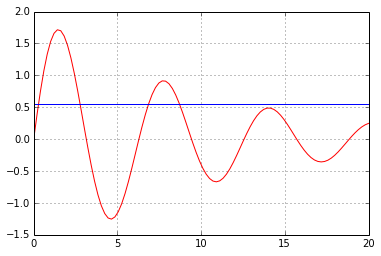

In [6]:
def f(x):
    return 2*math.exp(-0.1*x)*math.sin(x)
x = np.linspace(0,20,100)
fx = [f(xx) for xx in x]
plt.plot(x,fx, 'r')
plt.axhline(0.55)
plt.grid()

Solution 1 at x = 0.286953125
Solution 2 at x = 2.770390625
Solution 3 at x = 6.860859375
Solution 4 at x = 8.708046875


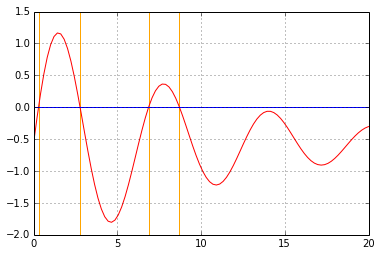

In [7]:
def f(x):
    return (2*math.exp(-0.1*x)*math.sin(x)) - 0.55

def bisection(l,r):
    m = (l+r)/2
    b = (r-l)/2
    if (b<(10**-4)):
        return m
    else:
        if ((f(l)*f(m))<0):
            return bisection(l,m)
        else:
            return bisection(m,r)
        
def allsoln(l,r):
    k = (r-l)/1000
    n = 1
    for i in range(1,1000):
        if ((f(l)*f(l+k))<0):
            ans = bisection(l,l+k)
            print "Solution " + str(n) + " at x = " + str(ans)
            plt.axvline(ans,color='orange')
            n += 1
        l += k
    
x = np.linspace(0,20,100)
fx = [f(xx) for xx in x]

allsoln(0.,20.)

plt.plot(x,fx, 'r')
plt.axhline(0)
plt.grid()

###Problem 3) (100)

3.1) (90 points) Use Newton's method to find intersection of the following two lines.

$$f(x) = e^x -1.5$$

$$g(x) = x + \sin(x)$$

Any **decent** result from Newton's method will get your full credit. You **must** use Newton's method. No credit will be given to any other method. 

<span style="color:red">90</span>

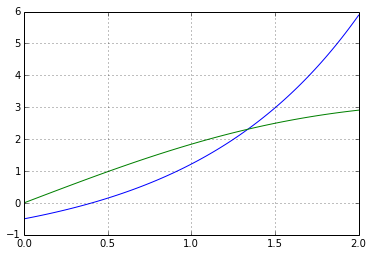

In [8]:
def f(x):
    return math.exp(x) - 1.5
def g(x):
    return x + math.sin(x)
x = np.linspace(0,2,100)
fx = [f(xx) for xx in x]
gx = [g(xx) for xx in x]
plt.plot(x,fx)
plt.plot(x,gx)
plt.grid()

Solution at x = 1.3378500577


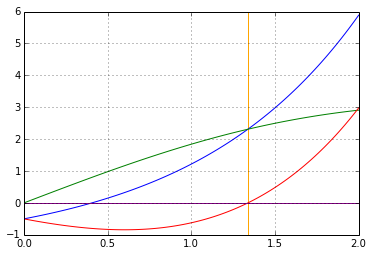

In [9]:
def f(x):
    return math.exp(x) - 1.5
def g(x):
    return x + math.sin(x)

def i(x):
    return f(x)-g(x)
def id(x):
    return math.exp(x)-math.cos(x)-1

def newton(n):
    while (abs(i(n))>(10**-4)):
        n = (n - (i(n)/id(n)))
    return n

x = np.linspace(0,2,100)
fx = [f(xx) for xx in x]
gx = [g(xx) for xx in x]
ix = [i(xx) for xx in x]

ans = newton(1.0)
print "Solution at x = " + str(ans)
plt.axvline(ans,color='orange')

plt.plot(x,fx)
plt.plot(x,gx)
plt.plot(x,ix)
plt.axhline(0,color='purple')
plt.grid()

3.2)(5 Points) Which method converge faster: Newton's Method or bisection?

<span style="color:red">5</span>

In [10]:
print "Newton"

Newton


3.3) (5 Points) Does Newton's method guarantee to convege to the real answer?

<span style="color:red">5</span>

In [11]:
print "No"

No


### Problem 4)  (100)

4.1)(35 points) Show that

$$f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} + O(h^2)$$

<span style="color:red">35</span>

In [12]:
print "See paper for proof!"

See paper for proof!


4.2)(35 points) Let
$$f(x) = \sin(x^2)$$
Plot for $x \in [0,2\pi]$ the following lines

1. $f(x)$
2. $f'(x)$ caculated numerically using central difference method
3. $f''(x)$ calculated numerically

Pick appropriate value for $h$. Analytical answers will not be accepted.

<span style="color:red">35</span>

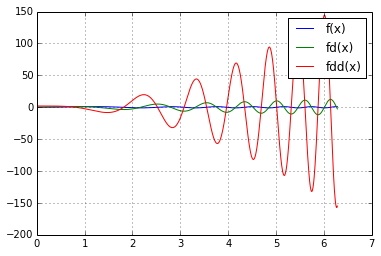

In [13]:
def f(x):
    return math.sin(x**2)

def fd(x,h):
    return (f(x+(h/2))-f(x-(h/2)))/h

def fdd(x,h):
    return (f(x+h)-(2*f(x))+f(x-h))/(h**2)

x = np.linspace(0,2*math.pi,1000)
fx = [f(xx) for xx in x]
fdx = [fd(xx,0.0001) for xx in x]
fddx = [fdd(xx,0.0001) for xx in x]


plt.plot(x,fx,label='f(x)')
plt.plot(x,fdx,label='fd(x)')
plt.plot(x,fddx,label='fdd(x)')
plt.grid()
plt.legend()

4.3)(30 points) Plot polynomial of **degree 3** that passes through the following four points.
$$(0.1, 3), (0.2,1), (0.5, -1), (1, 1) $$

Make sure your polynomial is of **degree 3**.

<span style="color:red">30</span>


If you look at the nested for-loop in
the legendre function, you will see that
we multiply the variable w three times
(len(xl)=4, and we skip one index).

Because we have each multiplication 
iteration has an x variable with power 1,
the w variable will have their highest x
power to be x^3 after 3 iterations.

The w variable is then added to p, however
the highest degree of x will still remain
3. Thus, the degree of our final polynomial
funtion is 3.



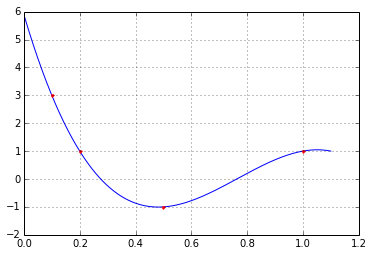

In [14]:
def legendre(xl,yl,x):
    p = 0
    for i in range(len(xl)):
        w = 1
        for j in range(len(xl)):
            if (i==j):
                continue
            w *= ((x-xl[j])/(xl[i]-xl[j])) # Multiplied three times
        p += yl[i]*w
    return p
    
x = [0.1,0.2,0.5,1.]
y = [3.,1.,-1.,1.]

xs = np.linspace(0.0,1.1,1000)
ys = [legendre(x,y,xx) for xx in xs]

print """
If you look at the nested for-loop in
the legendre function, you will see that
we multiply the variable w three times
(len(xl)=4, and we skip one index).

Because we have each multiplication 
iteration has an x variable with power 1,
the w variable will have their highest x
power to be x^3 after 3 iterations.

The w variable is then added to p, however
the highest degree of x will still remain
3. Thus, the degree of our final polynomial
funtion is 3.
"""

plt.plot(xs,ys)
plt.plot(x,y,'.',color='red')
plt.grid()

###Problem 5)  (100)

5.1) (70 points)Use trapezoid rule with 100 subdivision to find the following calculate the following integral.

$$ \int\limits_{x=1}^{x=2} \frac{1}{x} \; dx$$

<span style="color:red">70. You normall don't want to name a variable `sum` in python. It clashes with the `sum` function.</span>

In [15]:
def f(x):
    return 1/x

def trap(a,b,n):
    h = (b-a)/n
    sum = (f(a)+f(b))/2.
    for i in range(1,n):
        sum += f(a+(i*h))
    return h*sum

print "Trapezoid estimation with 100 sub divisions = " + str(trap(1.,2.,100))

Trapezoid estimation with 100 sub divisions = 0.693153430482


5.2) (15 points)What is bound on **truncation error** for your answer in 5.1)

<span style="color:red">15</span>

In [16]:
print """
TEB = (1/12)*(((2-1)^3)/(100^2))*(f"(z))
where z is in range(1,2)

f"(z) = 2/(z^3)
and f"(z) is max when z=1, therefore 
TEB = (1/12)*(((2-1)^3)/(100^2))*(2/(1^3))

See paper for clearer answer :)
"""
print "Therefore truncation error bound is " + str((1./12.)*((1.**3.)/(100.**2.))*(2./(1.**3.)))

# print trap(1.,2.,100)-math.log(2)-math.log(1)


TEB = (1/12)*(((2-1)^3)/(100^2))*(f"(z))
where z is in range(1,2)

f"(z) = 2/(z^3)
and f"(z) is max when z=1, therefore 
TEB = (1/12)*(((2-1)^3)/(100^2))*(2/(1^3))

See paper for clearer answer :)

Therefore truncation error bound is 1.66666666667e-05


5.3) (15 points) How many subdivision do we need to make sure that our answer is at most $10^{-6}$ from the real answer?

<span style="color:red">15</span>

In [17]:
def subdivisions(b):
    n = 1
    error = (1./12.)*((1.**3.)/(n**2.))*(2./(1.**3.))
    while (abs(error)>b):
        n += 1
        error = (1./12.)*((1.**3.)/(n**2.))*(2./(1.**3.))
    return n

print "You will need " + str(subdivisions(10**-6)) + " subdivisions to be 10^-6 away from the real answer."

You will need 409 subdivisions to be 10^-6 away from the real answer.


###Problem 6) (100)

<span style="color:red">100</span>

6.1) (70 points) An ice cream store record the temperature and number of ice cream sold on each day. The store have the following data. The store owner want to model the data with a straight line
$$ s = at + b$$
where $s$ is sale number and $t$ is temperature in celcius.

Find the slope and intercept of the best fitted line using least square method.

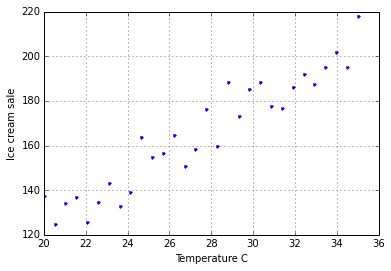

In [18]:
temperature = [ 20.        ,  20.51724138,  21.03448276,  21.55172414,
        22.06896552,  22.5862069 ,  23.10344828,  23.62068966,
        24.13793103,  24.65517241,  25.17241379,  25.68965517,
        26.20689655,  26.72413793,  27.24137931,  27.75862069,
        28.27586207,  28.79310345,  29.31034483,  29.82758621,
        30.34482759,  30.86206897,  31.37931034,  31.89655172,
        32.4137931 ,  32.93103448,  33.44827586,  33.96551724,
        34.48275862,  35.        ]
sale = [ 137.51785095,  124.64402538,  134.12166738,  136.9660818 ,
        125.79715671,  134.69878693,  143.17103597,  132.86731762,
        139.17234271,  163.95542568,  154.81626083,  156.57737534,
        164.53795806,  150.94106806,  158.46257369,  176.40478845,
        159.69716465,  188.52792981,  173.26043665,  185.19117472,
        188.23649894,  177.70904806,  176.95357726,  186.04751343,
        192.19480621,  187.55949344,  195.22922111,  201.86099821,
        195.35633724,  217.96614178]
plt.plot(temperature, sale, '.')
plt.ylabel('Ice cream sale')
plt.xlabel('Temperature C')
plt.grid()

In [19]:
def e(x):
    return np.sum(x)/len(x)

def cov(x,y):
    return e(x*y)-(e(y)*e(x))

def var(x):
    return e(x**2)-(e(x)**2)

temperature = [ 20.        ,  20.51724138,  21.03448276,  21.55172414,
        22.06896552,  22.5862069 ,  23.10344828,  23.62068966,
        24.13793103,  24.65517241,  25.17241379,  25.68965517,
        26.20689655,  26.72413793,  27.24137931,  27.75862069,
        28.27586207,  28.79310345,  29.31034483,  29.82758621,
        30.34482759,  30.86206897,  31.37931034,  31.89655172,
        32.4137931 ,  32.93103448,  33.44827586,  33.96551724,
        34.48275862,  35.        ]
sale = [ 137.51785095,  124.64402538,  134.12166738,  136.9660818 ,
        125.79715671,  134.69878693,  143.17103597,  132.86731762,
        139.17234271,  163.95542568,  154.81626083,  156.57737534,
        164.53795806,  150.94106806,  158.46257369,  176.40478845,
        159.69716465,  188.52792981,  173.26043665,  185.19117472,
        188.23649894,  177.70904806,  176.95357726,  186.04751343,
        192.19480621,  187.55949344,  195.22922111,  201.86099821,
        195.35633724,  217.96614178]

t = np.array(temperature)
s= np.array(sale)

a = cov(t,s)/var(t)
b = e(s)-(a*e(t))

print "Slope of best fitted line is " + str(a)
print "y-intercept of best fitted line is " + str(b)

Slope of best fitted line is 5.32377667673
y-intercept of best fitted line is 18.944209959


6.2) (15 points)Plot the best fitted line along with the data points.

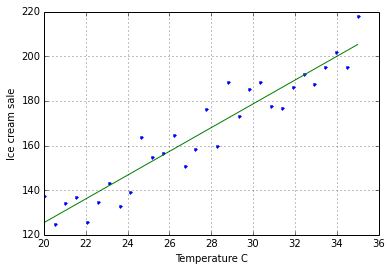

In [20]:
def e(x):
    return np.sum(x)/len(x)

def cov(x,y):
    return e(x*y)-(e(y)*e(x))

def var(x):
    return e(x**2)-(e(x)**2)

temperature = [ 20.        ,  20.51724138,  21.03448276,  21.55172414,
        22.06896552,  22.5862069 ,  23.10344828,  23.62068966,
        24.13793103,  24.65517241,  25.17241379,  25.68965517,
        26.20689655,  26.72413793,  27.24137931,  27.75862069,
        28.27586207,  28.79310345,  29.31034483,  29.82758621,
        30.34482759,  30.86206897,  31.37931034,  31.89655172,
        32.4137931 ,  32.93103448,  33.44827586,  33.96551724,
        34.48275862,  35.        ]
sale = [ 137.51785095,  124.64402538,  134.12166738,  136.9660818 ,
        125.79715671,  134.69878693,  143.17103597,  132.86731762,
        139.17234271,  163.95542568,  154.81626083,  156.57737534,
        164.53795806,  150.94106806,  158.46257369,  176.40478845,
        159.69716465,  188.52792981,  173.26043665,  185.19117472,
        188.23649894,  177.70904806,  176.95357726,  186.04751343,
        192.19480621,  187.55949344,  195.22922111,  201.86099821,
        195.35633724,  217.96614178]

t = np.array(temperature)
s= np.array(sale)

a = cov(t,s)/var(t)
b = e(s)-(a*e(t))

yt = [(a*xx)+b for xx in t]

plt.plot(temperature, sale, '.')
plt.plot(temperature, yt)
plt.ylabel('Ice cream sale')
plt.xlabel('Temperature C')
plt.grid()

6.3) (15 points) If the temperature today is 30 degree, how many ice cream do we expect to sell?

In [21]:
def e(x):
    return np.sum(x)/len(x)

def cov(x,y):
    return e(x*y)-(e(y)*e(x))

def var(x):
    return e(x**2)-(e(x)**2)

temperature = [ 20.        ,  20.51724138,  21.03448276,  21.55172414,
        22.06896552,  22.5862069 ,  23.10344828,  23.62068966,
        24.13793103,  24.65517241,  25.17241379,  25.68965517,
        26.20689655,  26.72413793,  27.24137931,  27.75862069,
        28.27586207,  28.79310345,  29.31034483,  29.82758621,
        30.34482759,  30.86206897,  31.37931034,  31.89655172,
        32.4137931 ,  32.93103448,  33.44827586,  33.96551724,
        34.48275862,  35.        ]
sale = [ 137.51785095,  124.64402538,  134.12166738,  136.9660818 ,
        125.79715671,  134.69878693,  143.17103597,  132.86731762,
        139.17234271,  163.95542568,  154.81626083,  156.57737534,
        164.53795806,  150.94106806,  158.46257369,  176.40478845,
        159.69716465,  188.52792981,  173.26043665,  185.19117472,
        188.23649894,  177.70904806,  176.95357726,  186.04751343,
        192.19480621,  187.55949344,  195.22922111,  201.86099821,
        195.35633724,  217.96614178]

t = np.array(temperature)
s= np.array(sale)

a = cov(t,s)/var(t)
b = e(s)-(a*e(t))

exp = (a*30.)+b
print exp
print "If 30 degrees, we would expect to sell around " + str(int(round(exp))) + " ice-creams using BFL model."

178.657510261
If 30 degrees, we would expect to sell around 179 ice-creams using BFL model.


###Problem 7) (100)

<span style="color:red">100</span>

7) Find the area of the shaded region to a decent accuracy. 

The blue line is
$$f(x) = e^{-x}\sin(\pi x)$$
and the green line is
$$g(x) = 0.5 - \frac{x}{2.5}$$

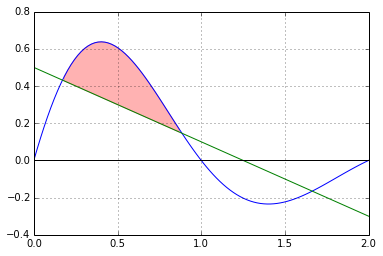

In [22]:
x = np.linspace(0,2,100)
def f(x):
    return math.exp(-x)*math.sin(math.pi*x)
def g(x):
    return 0.5-x/2.5
fx = np.array([f(xx) for xx in x])
gx = np.array([g(xx) for xx in x])
plt.plot(x,fx)
plt.plot(x,gx)
plt.grid()
plt.axhline(0,color='k')
plt.fill_between(x,fx,gx,where=((fx>gx) & (gx>0)), color='red', alpha=0.3)

Therefore area of the shaded region is 0.140923463305


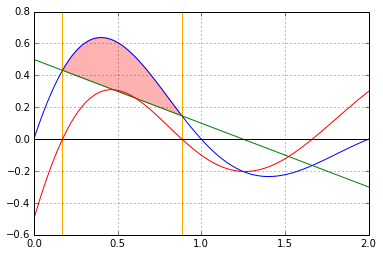

In [23]:
x = np.linspace(0,2,100)

def f(x):
    return math.exp(-x)*math.sin(math.pi*x)
def g(x):
    return 0.5-x/2.5

def i(x):
    return f(x)-g(x)

def bisection(l,r):
    m = (l+r)/2
    b = (r-l)/2
    if (b<(10**-4)):
        return m
    else:
        if ((i(l)*i(m))<0):
            return bisection(l,m)
        else:
            return bisection(m,r)

def trapf(a,b,n):
    h = (b-a)/n
    sum = (f(a)+f(b))/2.
    for i in range(1,n):
        sum += f(a+(i*h))
    return h*sum

def trapg(a,b,n):
    h = (b-a)/n
    sum = (g(a)+g(b))/2.
    for i in range(1,n):
        sum += g(a+(i*h))
    return h*sum
        
fx = np.array([f(xx) for xx in x])
gx = np.array([g(xx) for xx in x])
ix = np.array([i(xx) for xx in x])

a = bisection(0.0,0.3) # bound 1 for implicit diff
b = bisection(0.6,1.0) # bound 2 for implicit diff
plt.axvline(a,color='orange')
plt.axvline(b,color='orange')

areaf = trapf(a,b,1000)
areag = trapg(a,b,1000)

ans = areaf-areag
print "Therefore area of the shaded region is " + str(ans)

plt.plot(x,fx)
plt.plot(x,gx)
plt.plot(x,ix)
plt.grid()
plt.axhline(0,color='k')
plt.fill_between(x,fx,gx,where=((fx>gx) & (gx>0)), color='red', alpha=0.3)

###Problem 8)  (100)

8) Cheating Fourier Series. In the homework you have found that you can approximate the function using a bunch of sine and cosine and there is a way to find each of the coefficient by performing integrations.

Now we are going to achieve a similar effect **without** integration. We will use least square method instead.

Let us consider the triangular function shown below. We want to approximate this using a bunch of sines:

$$ \text{triangle}(x) \approx a \sin(\pi x) + b \sin(3 \pi x) + c \sin(5 \pi x) $$

**Find a, b, and c using least squre method. Plot your approximation along with triangular curve.**

Hint: This question is actually much easier than it looks. Figure out what is your data and what is your parameter.

Hint2: You may use `np.linalg.solve`. Type `?np.linalg.solve` for documentation. Scroll down for example. Also, `np.sin` and all those numpy broadcast operations will save countless number of lines from your code.

<span style="color:red">100</span>

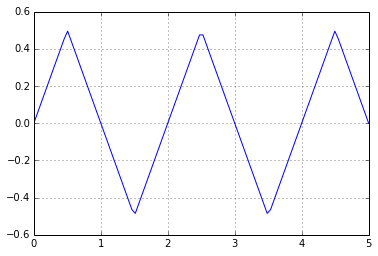

In [24]:
def triangle(x):
    t = x%2.0
    if t < 0.5: 
        return 1*t
    elif t < 1.5:
        return 1-t
    else:
        return t-2

x = np.linspace(0,5,100)
y = [triangle(xx) for xx in x]
plt.plot(x,y)
plt.grid()

a = 0.405267728003
b = -0.0450146186163
c = 0.0161943468148


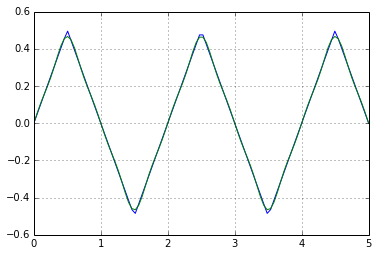

In [25]:
def e(x):
    return np.sum(x)/len(x)

def triangle(x):
    t = x%2.0
    if t < 0.5: 
        return 1*t
    elif t < 1.5:
        return 1-t
    else:
        return t-2

def f(x,a,b,c):
    return a*math.sin(math.pi*x)+b*math.sin(3*math.pi*x)+c*math.sin(5*math.pi*x)

x = np.linspace(0,5,100)
y = [triangle(xx) for xx in x]

x = np.array(x)
A = [[e(np.sin(math.pi*x)**2), e(np.sin(math.pi*x)*np.sin(3*math.pi*x)), e(np.sin(math.pi*x)*np.sin(5*math.pi*x))],
    [e(np.sin(math.pi*x)*np.sin(3*math.pi*x)), e(np.sin(3*math.pi*x)**2), e(np.sin(5*math.pi*x)*np.sin(3*math.pi*x))],
    [e(np.sin(math.pi*x)*np.sin(5*math.pi*x)), e(np.sin(5*math.pi*x)*np.sin(3*math.pi*x)), e(np.sin(5*math.pi*x)**2)]]

C = [e(np.sin(math.pi*x)*y), e(np.sin(3*math.pi*x)*y), e(np.sin(5*math.pi*x)*y)]

a,b,c = np.linalg.solve(A,C)

print "a = " + str(a)
print "b = " + str(b)
print "c = " + str(c)

ys = [f(xx,a,b,c) for xx in x]
plt.plot(x,y)
plt.plot(x,ys)
plt.grid()